In [4]:

# import and set up environment
import sys
from subprocess import call
import nibabel as nib
import pydicom as dicom
import numpy as np
import time
import os
# os.chdir("..")
from glob import glob
import shutil
import pandas as pd
# from import convertDicomFileToNifti
from rtCommon.imageHandling import convertDicomImgToNifti, readDicomFromFile
from rtCommon.cfg_loading import mkdir,cfg_loading
import pickle5 as pickle
def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [6]:
di = load_obj(f"./tmp__folder_2021-05-25-15-04-18/sub002_78_schaefer2018_realtime_19")
di

{'subject': 'sub002',
 'startFromN': 78,
 'currNumberOfROI': 19,
 'bestAcc': array(0.48310062),
 'bestROIs': ('19.nii.gz',
  '195.nii.gz',
  '114.nii.gz',
  '163.nii.gz',
  '76.nii.gz',
  '258.nii.gz',
  '89.nii.gz',
  '249.nii.gz',
  '126.nii.gz',
  '93.nii.gz',
  '67.nii.gz',
  '10.nii.gz',
  '2.nii.gz',
  '238.nii.gz',
  '204.nii.gz',
  '150.nii.gz',
  '87.nii.gz',
  '22.nii.gz',
  '193.nii.gz')}

In [9]:
#  this script is meant to deal with the data of 8 recognition runs and generate models saved in corresponding folder
'''
input:
    cfg.session=ses1
    cfg.modelFolder=f"{cfg.subjects_dir}/{cfg.subjectName}/{cfg.session}_recognition/clf/"
    cfg.dataFolder=f"{cfg.subjects_dir}/{cfg.subjectName}/{cfg.session}_recognition/"
output:
    models in cfg.modelFolder
'''


import os
import sys
sys.path.append('/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/')
import argparse
import numpy as np
import nibabel as nib
import scipy.io as sio
import subprocess
from scipy.stats import zscore
from nibabel.nicom import dicomreaders
import pydicom as dicom  # type: ignore
import time
from glob import glob
import shutil
from nilearn.image import new_img_like
import joblib
import rtCommon.utils as utils
from rtCommon.utils import loadConfigFile
import pickle5 as pickle
def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
# from rtCommon.fileClient import FileInterface
# import rtCommon.projectUtils as projUtils
# from rtCommon.imageHandling import readRetryDicomFromFileInterface, getDicomFileName, convertDicomImgToNifti


argParser = argparse.ArgumentParser()
argParser.add_argument('--config', '-c', default='sub002.ses2.toml', type=str, help='experiment file (.json or .toml)')
argParser.add_argument('--skipPre', '-s', default=True, action='store_true', help='skip preprocess or not')
argParser.add_argument('--skipGreedy', '-g', default=0, type=int, help='skip greedy or not')
argParser.add_argument('--forceGreedy', default=True, action='store_true', help='whether to force Greedy search in current session')
argParser.add_argument('--testRun', '-t', default=None, type=int, help='testRun, can be [None,1,2,3,4,5,6,7,8]')
argParser.add_argument('--scan_asTemplate', '-a', default=2, type=int, help="which scan's middle dicom as Template?")

args = argParser.parse_args("")
from rtCommon.cfg_loading import mkdir,cfg_loading
# config="sub001.ses2.toml"
cfg = cfg_loading(args.config)

sys.path.append('/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/expScripts/recognition/')
from recognition_dataAnalysisFunctions import recognition_preprocess,minimalClass,behaviorDataLoading,greedyMask,normalize #,classifierEvidence
def wait(waitfor, delay=1):
    while not os.path.exists(waitfor):
        time.sleep(delay)
        print('waiting for {}'.format(waitfor))

'''
convert all dicom files into nii files in the temp dir. 
find the middle volume of the run1 as the template volume
align every other functional volume with templateFunctionalVolume (3dvolreg)
'''

toml filename=/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/projects/rtSynth_rt/conf/sub002.ses2.toml


'\nconvert all dicom files into nii files in the temp dir. \nfind the middle volume of the run1 as the template volume\nalign every other functional volume with templateFunctionalVolume (3dvolreg)\n'

In [16]:
import os
print(f"conda env={os.environ['CONDA_DEFAULT_ENV']}") 
import numpy as np
import nibabel as nib
import sys
sys.path.append('/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/')
import time
import pandas as pd
from sklearn.linear_model import LogisticRegression
import itertools
# from tqdm import tqdm
import pickle5 as pickle
import subprocess
from subprocess import call
def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

# What subject are you running
'''
Takes args (in order):
    subject (e.g. sub001)
    dataSource (e.g. realtime)
    roiloc (wang2014 or schaefer2018)
    N (the number of parcels or ROIs to start with)
'''


from rtCommon.cfg_loading import mkdir,cfg_loading
# config="sub001.ses1.toml"
# cfg = cfg_loading(config)

subject,dataSource,roiloc,N=cfg.subjectName,"realtime","schaefer2018",N
# subject,dataSource,roiloc,N=sys.argv[1],sys.argv[2],sys.argv[3],int(sys.argv[4])


conda env=/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud


In [19]:
print("Running subject {}, with {} as a data source, {}, starting with {} ROIs".format(subject, dataSource, roiloc, N))
funcdata = cfg.recognition_dir + "brain_run{run}.npy"
metadata = cfg.recognition_dir + "behav_run{run}.csv"
topN = load_obj(f"{cfg.recognition_expScripts_dir}top{N}ROIs")
print(f"len(topN)={len(topN)}")
print(f"GMschaefer_ topN loaded from neurosketch={topN}")


Running subject sub002, with realtime as a data source, schaefer2018, starting with 78 ROIs
len(topN)=78
GMschaefer_ topN loaded from neurosketch=['234.nii.gz', '19.nii.gz', '225.nii.gz', '8.nii.gz', '86.nii.gz', '223.nii.gz', '159.nii.gz', '240.nii.gz', '148.nii.gz', '120.nii.gz', '195.nii.gz', '114.nii.gz', '222.nii.gz', '179.nii.gz', '65.nii.gz', '272.nii.gz', '235.nii.gz', '163.nii.gz', '56.nii.gz', '77.nii.gz', '108.nii.gz', '76.nii.gz', '284.nii.gz', '139.nii.gz', '295.nii.gz', '166.nii.gz', '271.nii.gz', '40.nii.gz', '164.nii.gz', '258.nii.gz', '151.nii.gz', '80.nii.gz', '89.nii.gz', '41.nii.gz', '214.nii.gz', '132.nii.gz', '249.nii.gz', '49.nii.gz', '259.nii.gz', '112.nii.gz', '21.nii.gz', '126.nii.gz', '58.nii.gz', '237.nii.gz', '218.nii.gz', '190.nii.gz', '186.nii.gz', '93.nii.gz', '67.nii.gz', '10.nii.gz', '209.nii.gz', '211.nii.gz', '230.nii.gz', '265.nii.gz', '52.nii.gz', '146.nii.gz', '205.nii.gz', '2.nii.gz', '238.nii.gz', '133.nii.gz', '220.nii.gz', '263.nii.gz', '204.n

In [20]:
topN = load_obj(f"{cfg.recognition_expScripts_dir}top{N}ROIs")
print(f"len(topN)={len(topN)}")
print(f"GMschaefer_ topN loaded from neurosketch={topN}")

def Wait(waitfor, delay=1):
    while not os.path.exists(waitfor):
        time.sleep(delay)
        print('waiting for {}'.format(waitfor))

imcodeDict={"A": "bed", "B": "Chair", "C": "table", "D": "bench"}

def getMask(topN, cfg):
    for pn, parc in enumerate(topN):
        _mask = nib.load(f"{cfg.subjects_dir}{cfg.subjectName}/ses1/recognition/mask/GMschaefer_{parc}")
        # schaefer_56.nii.gz
        aff = _mask.affine
        _mask = _mask.get_data()
        _mask = _mask.astype(int)
        # say some things about the mask.
        mask = _mask if pn == 0 else mask + _mask
        mask[mask>0] = 1
    return mask

mask=getMask(topN, cfg)

print('mask dimensions: {}'. format(mask.shape))
print('number of voxels in mask: {}'.format(np.sum(mask)))


len(topN)=78
GMschaefer_ topN loaded from neurosketch=['234.nii.gz', '19.nii.gz', '225.nii.gz', '8.nii.gz', '86.nii.gz', '223.nii.gz', '159.nii.gz', '240.nii.gz', '148.nii.gz', '120.nii.gz', '195.nii.gz', '114.nii.gz', '222.nii.gz', '179.nii.gz', '65.nii.gz', '272.nii.gz', '235.nii.gz', '163.nii.gz', '56.nii.gz', '77.nii.gz', '108.nii.gz', '76.nii.gz', '284.nii.gz', '139.nii.gz', '295.nii.gz', '166.nii.gz', '271.nii.gz', '40.nii.gz', '164.nii.gz', '258.nii.gz', '151.nii.gz', '80.nii.gz', '89.nii.gz', '41.nii.gz', '214.nii.gz', '132.nii.gz', '249.nii.gz', '49.nii.gz', '259.nii.gz', '112.nii.gz', '21.nii.gz', '126.nii.gz', '58.nii.gz', '237.nii.gz', '218.nii.gz', '190.nii.gz', '186.nii.gz', '93.nii.gz', '67.nii.gz', '10.nii.gz', '209.nii.gz', '211.nii.gz', '230.nii.gz', '265.nii.gz', '52.nii.gz', '146.nii.gz', '205.nii.gz', '2.nii.gz', '238.nii.gz', '133.nii.gz', '220.nii.gz', '263.nii.gz', '204.nii.gz', '150.nii.gz', '39.nii.gz', '62.nii.gz', '281.nii.gz', '160.nii.gz', '246.nii.gz', '2

/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0


mask dimensions: (64, 64, 36)
number of voxels in mask: 4784


In [22]:
runRecording = pd.read_csv(f"{cfg.recognition_dir}../runRecording.csv")
actualRuns = list(runRecording['run'].iloc[list(np.where(1==1*(runRecording['type']=='recognition'))[0])]) # can be [1,2,3,4,5,6,7,8] or [1,2,4,5]
if len(actualRuns) < 8:
    runRecording_preDay = pd.read_csv(f"{cfg.subjects_dir}{cfg.subjectName}/ses{cfg.session-1}/recognition/../runRecording.csv")
    actualRuns_preDay = list(runRecording_preDay['run'].iloc[list(np.where(1==1*(runRecording_preDay['type']=='recognition'))[0])])[-(8-len(actualRuns)):] # might be [5,6,7,8]
else: 
    actualRuns_preDay = []

# assert len(actualRuns_preDay)+len(actualRuns)==8 
if len(actualRuns_preDay)+len(actualRuns)<8:
    runRecording_prepreDay = pd.read_csv(f"{cfg.subjects_dir}{cfg.subjectName}/ses{cfg.session-2}/recognition/../runRecording.csv")
    actualRuns_prepreDay = list(runRecording_prepreDay['run'].iloc[list(np.where(1==1*(runRecording_prepreDay['type']=='recognition'))[0])])[-(8-len(actualRuns)-len(actualRuns_preDay)):] # might be [5,6,7,8]
else:
    actualRuns_prepreDay = []

objects = ['bed', 'bench', 'chair', 'table']


In [24]:

objects = ['bed', 'bench', 'chair', 'table']

brain_data=[]
behav_data=[]
for ii,run in enumerate(actualRuns): # load behavior and brain data for current session
    t = np.load(f"{cfg.recognition_dir}brain_run{run}.npy")
    t = normalize(t)
    brain_data.append(t)

    t = pd.read_csv(f"{cfg.recognition_dir}behav_run{run}.csv")
    t=list(t['Item'])
    behav_data.append(t)
for ii,run in enumerate(actualRuns_preDay): # load behavior and brain data for previous session
    t = np.load(f"{cfg.subjects_dir}{cfg.subjectName}/ses{cfg.session-1}/recognition/brain_run{run}.npy")
    t = normalize(t)
    brain_data.append(t)

    t = pd.read_csv(f"{cfg.subjects_dir}{cfg.subjectName}/ses{cfg.session-1}/recognition/behav_run{run}.csv")
    t=list(t['Item'])
    behav_data.append(t)
for ii,run in enumerate(actualRuns_prepreDay): # load behavior and brain data for previous session
    t = np.load(f"{cfg.subjects_dir}{cfg.subjectName}/ses{cfg.session-2}/recognition/brain_run{run}.npy")
    t = normalize(t)
    brain_data.append(t)

    t = pd.read_csv(f"{cfg.subjects_dir}{cfg.subjectName}/ses{cfg.session-2}/recognition/behav_run{run}.csv")
    t=list(t['Item'])
    behav_data.append(t)


tmp_folder = f"tmp__folder_{time.strftime('%Y-%m-%d-%H-%M-%S', time.localtime(time.time()))}" #tmp__folder
mkdir(f"{cfg.projectDir}{tmp_folder}")
save_obj([brain_data,behav_data],f"{cfg.projectDir}{tmp_folder}/{subject}_{dataSource}_{roiloc}_{N}") #{len(topN)}_{i}


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/scipy/stats/stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [25]:

def Class(brain_data,behav_data):
    # metas = bcvar[0]
    # data4d = data[0]
    print([t.shape for t in brain_data])

    accs = []
    for run in range(8):
        testX = brain_data[run]
        testY = behav_data[run]

        trainX=np.zeros((1,1))
        for i in range(8):
            if i !=run:
                trainX=brain_data[i] if trainX.shape==(1,1) else np.concatenate((trainX,brain_data[i]),axis=0)

        trainY = []
        for i in range(8):
            if i != run:
                trainY.extend(behav_data[i])
        clf = LogisticRegression(penalty='l2',C=1, solver='lbfgs', max_iter=1000, 
                                multi_class='multinomial').fit(trainX, trainY)

        # Monitor progress by printing accuracy (only useful if you're running a test set)
        acc = clf.score(testX, testY)
        accs.append(acc)

    return np.mean(accs)

if not os.path.exists(f"{cfg.projectDir}{tmp_folder}/{subject}_{N}_{roiloc}_{dataSource}_{len(topN)}.pkl"):
    brain_data = [t[:,mask==1] for t in brain_data]
    # _runs = [runs[:,mask==1]]
    print("Runs shape", [t.shape for t in brain_data])
    slstart = time.time()
    sl_result = Class(brain_data, behav_data)
    print(f"passed {time.time()-slstart}s for training")
    save_obj({"subject":subject,
    "startFromN":N,
    "currNumberOfROI":len(topN),
    "bestAcc":sl_result, # this is the sl_result for the topN, not the bestAcc, bestAcc is for the purpose of keeping consistent with others
    "bestROIs":topN},# this is the topN, not the bestROIs, bestROIs is for the purpose of keeping consistent with others
    f"{cfg.projectDir}{tmp_folder}/{subject}_{N}_{roiloc}_{dataSource}_{len(topN)}"
    )


Runs shape [(48, 4784), (48, 4784), (48, 4784), (48, 4784), (48, 4784), (47, 4784), (47, 4784), (48, 4784)]
[(48, 4784), (48, 4784), (48, 4784), (48, 4784), (48, 4784), (47, 4784), (47, 4784), (48, 4784)]
passed 2.8191730976104736s for training


In [27]:

if os.path.exists(f"{cfg.projectDir}{tmp_folder}/{subject}_{N}_{roiloc}_{dataSource}_{1}.pkl"):
    print(f"{cfg.projectDir}{tmp_folder}/{subject}_{N}_{roiloc}_{dataSource}_1.pkl exists")
    raise Exception('runned or running')


In [28]:
f"{cfg.projectDir}{tmp_folder}/holdon"

'/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder_2021-05-25-20-58-21/holdon'

In [31]:
tmpFile='/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder_2021-05-25-15-04-18/sub002_78_schaefer2018_realtime_2_0'
os.path.dirname(tmpFile)



'/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder_2021-05-25-15-04-18'

In [41]:
a="dsa"
if a:
    print(a)
else:
    print(1)
def append_file(fileName,text):
    # Open a file with access mode 'a'
    file_object = open(fileName, 'a')
    # Append 'hello' at the end of file
    file_object.write(text)
    # Close the file
    file_object.close()

append_file('test.txt',"teshahahat")

dsa


In [47]:
print('ses2')
file='/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder_2021-05-25-23-09-36/recording.txt'
f = open(file, "r")
print(f.read())

ses2
 

 bestID=13; best Acc = 0.47417996453900707 

 bestROIs=('19.nii.gz', '225.nii.gz', '159.nii.gz', '272.nii.gz', '163.nii.gz', '284.nii.gz', '40.nii.gz', '89.nii.gz', '126.nii.gz', '10.nii.gz', '230.nii.gz', '2.nii.gz', '150.nii.gz', '30.nii.gz') 

 new trained full rotation 4 way accuracy mean=0.47417996453900707 

 mean of 2 way clf acc full rotation = 0.6921422101449276


In [44]:
print('ses3')
file='/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder_2021-05-25-21-38-58/recording.txt'
f = open(file, "r")
print(f.read())

ses3
 

 bestID=25; best Acc = 0.5104166666666666 

 bestROIs=('234.nii.gz', '19.nii.gz', '223.nii.gz', '163.nii.gz', '284.nii.gz', '139.nii.gz', '166.nii.gz', '40.nii.gz', '89.nii.gz', '41.nii.gz', '214.nii.gz', '259.nii.gz', '58.nii.gz', '237.nii.gz', '190.nii.gz', '93.nii.gz', '67.nii.gz', '10.nii.gz', '263.nii.gz', '39.nii.gz', '281.nii.gz', '246.nii.gz', '280.nii.gz', '22.nii.gz', '244.nii.gz', '79.nii.gz') 

 new trained full rotation 4 way accuracy mean=0.5104166666666666 

 mean of 2 way clf acc full rotation = 0.6831597222222223


In [45]:
print('ses4')
file='/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder_2021-05-25-21-43-37/recording.txt'
f = open(file, "r")
print(f.read())

ses4
 

 bestID=26; best Acc = 0.5000048180696886 

 bestROIs=('19.nii.gz', '240.nii.gz', '195.nii.gz', '114.nii.gz', '272.nii.gz', '163.nii.gz', '56.nii.gz', '76.nii.gz', '295.nii.gz', '151.nii.gz', '132.nii.gz', '49.nii.gz', '112.nii.gz', '126.nii.gz', '58.nii.gz', '10.nii.gz', '265.nii.gz', '52.nii.gz', '205.nii.gz', '220.nii.gz', '150.nii.gz', '246.nii.gz', '87.nii.gz', '22.nii.gz', '244.nii.gz', '30.nii.gz', '79.nii.gz') 

 new trained full rotation 4 way accuracy mean=0.5000048180696886 

 mean of 2 way clf acc full rotation = 0.6767814009661836


In [46]:
print('ses5')
file='/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder_2021-05-25-21-43-45/recording.txt'
f = open(file, "r")
print(f.read())

ses5
 

 bestID=12; best Acc = 0.4920815024668517 

 bestROIs=('19.nii.gz', '223.nii.gz', '195.nii.gz', '65.nii.gz', '163.nii.gz', '259.nii.gz', '10.nii.gz', '133.nii.gz', '204.nii.gz', '246.nii.gz', '280.nii.gz', '87.nii.gz', '22.nii.gz') 

 new trained full rotation 4 way accuracy mean=0.4920815024668517 

 mean of 2 way clf acc full rotation = 0.7166845081247255


In [76]:

print('ses6 using ses6 mask')
file='/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder_2021-05-26-09-39-03/recording.txt'
f = open(file, "r")
print(f.read())

ses6 using ses6 mask
 

 bestID=20; best Acc = 0.5311391843971631 

 bestROIs=('19.nii.gz', '148.nii.gz', '65.nii.gz', '163.nii.gz', '295.nii.gz', '166.nii.gz', '40.nii.gz', '258.nii.gz', '80.nii.gz', '49.nii.gz', '21.nii.gz', '58.nii.gz', '10.nii.gz', '146.nii.gz', '238.nii.gz', '220.nii.gz', '204.nii.gz', '243.nii.gz', '280.nii.gz', '22.nii.gz', '193.nii.gz') 

 new trained full rotation 4 way accuracy mean=0.5311391843971631 

 mean of 2 way clf acc full rotation = 0.7286382850241546


In [75]:
print('ses6 using ses1 mask')
file='/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/subjects/sub002/ses6/recognition/recording.txt'
f = open(file, "r")
print(f.read())

ses6 using ses1 mask
 

 new trained full rotation 4 way accuracy mean=0.3605385638297872 

 mean of 2 way clf acc full rotation = 0.6456068840579711


In [51]:
chosenMask={'subject': 'sub002',
'startFromN': 78,
'currNumberOfROI': 19,
'bestAcc': 0.48310062,
'bestROIs': ('19.nii.gz',
'195.nii.gz',
'114.nii.gz',
'163.nii.gz',
'76.nii.gz',
'258.nii.gz',
'89.nii.gz',
'249.nii.gz',
'126.nii.gz',
'93.nii.gz',
'67.nii.gz',
'10.nii.gz',
'2.nii.gz',
'238.nii.gz',
'204.nii.gz',
'150.nii.gz',
'87.nii.gz',
'22.nii.gz',
'193.nii.gz')}
for a in chosenMask['bestROIs']:
    print(a,end="', '")

19.nii.gz', '195.nii.gz', '114.nii.gz', '163.nii.gz', '76.nii.gz', '258.nii.gz', '89.nii.gz', '249.nii.gz', '126.nii.gz', '93.nii.gz', '67.nii.gz', '10.nii.gz', '2.nii.gz', '238.nii.gz', '204.nii.gz', '150.nii.gz', '87.nii.gz', '22.nii.gz', '193.nii.gz', '

In [55]:
bestROIs1=('19.nii.gz', '195.nii.gz')

In [78]:
# ses1
bestROIs1=('19.nii.gz', '195.nii.gz', '114.nii.gz', '163.nii.gz', '76.nii.gz', '258.nii.gz', '89.nii.gz', '249.nii.gz', '126.nii.gz', '93.nii.gz', '67.nii.gz', '10.nii.gz', '2.nii.gz', '238.nii.gz', '204.nii.gz', '150.nii.gz', '87.nii.gz', '22.nii.gz', '193.nii.gz')
new_trained_full_rotation_4_way_accuracy_mean1=0.4831006205673759
mean_of_2_way_clf_acc_full_rotation1 = 0.6854242149758454

# ses2
# bestID=13; best Acc = 0.47417996453900707 
bestROIs2=('19.nii.gz', '225.nii.gz', '159.nii.gz', '272.nii.gz', '163.nii.gz', '284.nii.gz', '40.nii.gz', '89.nii.gz', '126.nii.gz', '10.nii.gz', '230.nii.gz', '2.nii.gz', '150.nii.gz', '30.nii.gz') 
new_trained_full_rotation_4_way_accuracy_mean2=0.47417996453900707 
mean_of_2_way_clf_acc_full_rotation2 = 0.6921422101449276

# ses3
# bestID=25; best Acc = 0.5104166666666666 
bestROIs3=('234.nii.gz', '19.nii.gz', '223.nii.gz', '163.nii.gz', '284.nii.gz', '139.nii.gz', '166.nii.gz', '40.nii.gz', '89.nii.gz', '41.nii.gz', '214.nii.gz', '259.nii.gz', '58.nii.gz', '237.nii.gz', '190.nii.gz', '93.nii.gz', '67.nii.gz', '10.nii.gz', '263.nii.gz', '39.nii.gz', '281.nii.gz', '246.nii.gz', '280.nii.gz', '22.nii.gz', '244.nii.gz', '79.nii.gz') 
new_trained_full_rotation_4_way_accuracy_mean3=0.5104166666666666 
mean_of_2_way_clf_acc_full_rotation3 = 0.6831597222222223

# ses4
# bestID=26; best Acc = 0.5000048180696886 
bestROIs4=('19.nii.gz', '240.nii.gz', '195.nii.gz', '114.nii.gz', '272.nii.gz', '163.nii.gz', '56.nii.gz', '76.nii.gz', '295.nii.gz', '151.nii.gz', '132.nii.gz', '49.nii.gz', '112.nii.gz', '126.nii.gz', '58.nii.gz', '10.nii.gz', '265.nii.gz', '52.nii.gz', '205.nii.gz', '220.nii.gz', '150.nii.gz', '246.nii.gz', '87.nii.gz', '22.nii.gz', '244.nii.gz', '30.nii.gz', '79.nii.gz') 
new_trained_full_rotation_4_way_accuracy_mean4=0.5000048180696886 
mean_of_2_way_clf_acc_full_rotation4 = 0.6767814009661836

# ses5
# bestID=12; best Acc = 0.4920815024668517 
bestROIs5=('19.nii.gz', '223.nii.gz', '195.nii.gz', '65.nii.gz', '163.nii.gz', '259.nii.gz', '10.nii.gz', '133.nii.gz', '204.nii.gz', '246.nii.gz', '280.nii.gz', '87.nii.gz', '22.nii.gz') 
new_trained_full_rotation_4_way_accuracy_mean5=0.4920815024668517 
mean_of_2_way_clf_acc_full_rotation5 = 0.7166845081247255

# ses6
# bestID=20; best Acc = 0.5311391843971631 
bestROIs6=('19.nii.gz', '148.nii.gz', '65.nii.gz', '163.nii.gz', '295.nii.gz', '166.nii.gz', '40.nii.gz', '258.nii.gz', '80.nii.gz', '49.nii.gz', '21.nii.gz', '58.nii.gz', '10.nii.gz', '146.nii.gz', '238.nii.gz', '220.nii.gz', '204.nii.gz', '243.nii.gz', '280.nii.gz', '22.nii.gz', '193.nii.gz') 
new_trained_full_rotation_4_way_accuracy_mean6=0.5311391843971631 
mean_of_2_way_clf_acc_full_rotation6 = 0.7286382850241546


bestROIs=[bestROIs1,bestROIs2,bestROIs3,bestROIs4,bestROIs5,bestROIs6]
new_trained_full_rotation_4_way_accuracy_mean=[new_trained_full_rotation_4_way_accuracy_mean1,
                                               new_trained_full_rotation_4_way_accuracy_mean2,
                                               new_trained_full_rotation_4_way_accuracy_mean3,
                                              new_trained_full_rotation_4_way_accuracy_mean4,
                                              new_trained_full_rotation_4_way_accuracy_mean5,
                                              new_trained_full_rotation_4_way_accuracy_mean6]
mean_of_2_way_clf_acc_full_rotation=[mean_of_2_way_clf_acc_full_rotation1,
                                    mean_of_2_way_clf_acc_full_rotation2,
                                    mean_of_2_way_clf_acc_full_rotation3,
                                    mean_of_2_way_clf_acc_full_rotation4,
                                    mean_of_2_way_clf_acc_full_rotation5,
                                    mean_of_2_way_clf_acc_full_rotation6]
_bestROIs=[]
for i in bestROIs:
    _bestROIs.append([int(a.split('.')[0]) for a in i])

Text(0.5, 0, 'session ID')

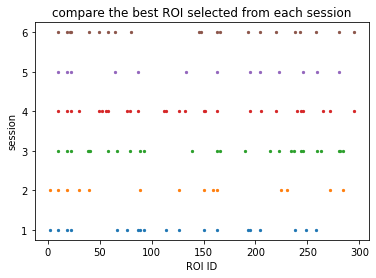

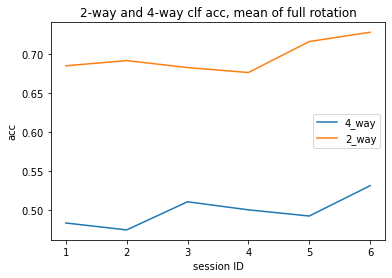

In [96]:
import matplotlib.pyplot as plt
for currSession in range(1,len(_bestROIs)+1):
    plt.scatter(_bestROIs[currSession-1],[currSession]*len(_bestROIs[currSession-1]),s=5,label=f"session{currSession}")
plt.title("compare the best ROI selected from each session")    
plt.ylabel("session")
plt.xlabel("ROI ID")
# plt.xlim([0,500])
# plt.legend()

plt.figure()
plt.plot(np.arange(1,7),new_trained_full_rotation_4_way_accuracy_mean,label="4_way")
# plt.title("new_trained_full_rotation_4_way_accuracy_mean")

# plt.figure()
plt.plot(np.arange(1,7),mean_of_2_way_clf_acc_full_rotation,label="2_way")
# plt.title("mean_of_2_way_clf_acc_full_rotation")
plt.title("2-way and 4-way clf acc, mean of full rotation")
plt.legend()
plt.ylabel("acc")
plt.xlabel("session ID")


Text(0, 0.5, 'count of existence')

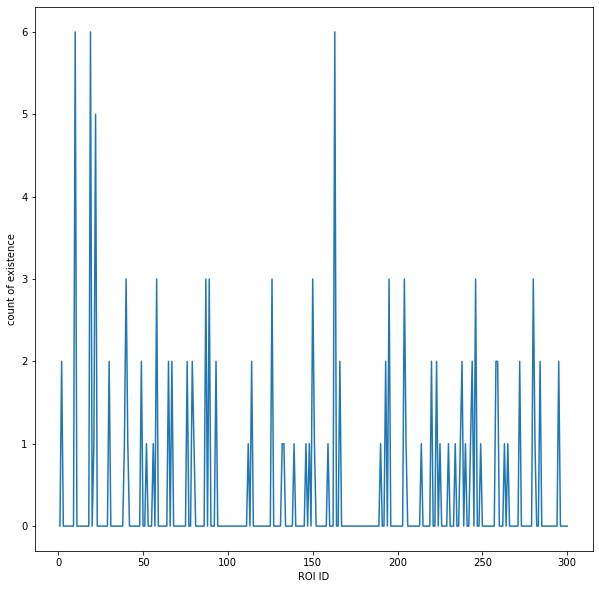

In [170]:
array=np.zeros((6,300))

for currROI in range(1,301):
    for currSes in range(1,7):
        if currROI in _bestROIs[currSes-1]:
            array[currSes-1, currROI-1] = 1
# plt.imshow(array)
plt.figure(figsize=(10,10))
plt.plot(np.arange(1,301),np.sum(array,axis=0))
plt.xlabel("ROI ID")
plt.ylabel("count of existence")

(array([27.,  0., 20.,  0., 10.,  0.,  0.,  0.,  1.,  3.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

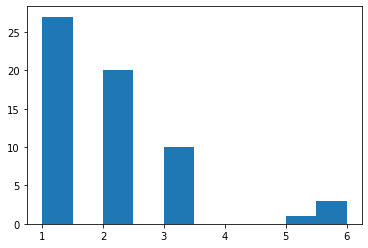

In [182]:
arrayMean=np.sum(array,axis=0)
arrayMean[arrayMean==0]=None
plt.hist(arrayMean)
# plt.xlim([0.9,6.5])

In [181]:
print(f"ID of survived ROI in all sessions={np.where(arrayMean==6)[0]+1},possible range 1-300")

ID of survived ROI in all sessions=[ 10  19 163],possible range 1-300


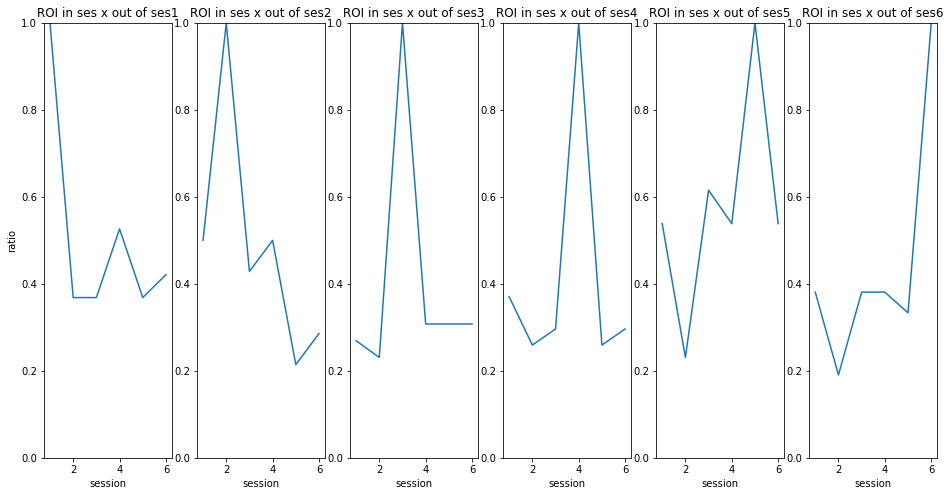

In [154]:
def inRatio(a1,a2):
    count=0
    for t in a2:
        if t in a1:
            count+=1
    return count/len(a1)


plt.figure(figsize=(16, 8)) 

for i in range(1,7):
    ratios=[]
    for currSession in range(1,7):
        t = inRatio(_bestROIs[i-1],_bestROIs[currSession-1])
        ratios.append(t)
    plt.subplot(1,6,i)
    plt.plot(np.arange(1,7),ratios)
    plt.xlabel("session")
    if i == 1:
        plt.ylabel("ratio")
    plt.ylim([0,1])
    plt.title(f"ROI in ses x out of ses{i}")

# ratios=[]
# for currSession in range(1,7):
#     t = inRatio(_bestROIs[1],_bestROIs[currSession-1])
#     ratios.append(t)
# plt.subplot(1,6,2)
# plt.plot(np.arange(1,7),ratios)
# plt.xlabel("session")
# plt.ylim([0,1])
# plt.title("ratio of ROI in ses x out of ses2")

# ratios=[]
# for currSession in range(1,7):
#     t = inRatio(_bestROIs[1],_bestROIs[currSession-1])
#     ratios.append(t)
# plt.subplot(1,6,2)
# plt.plot(np.arange(1,7),ratios)
# plt.xlabel("session")
# plt.ylim([0,1])
# plt.title("ratio of ROI in ses x out of ses2")

Text(0.5, 0, 'session ID')

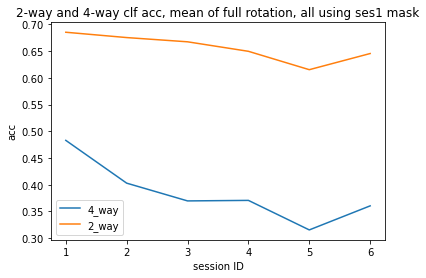

In [101]:
way4=[0.4831006205673759, 0.4030363475177305, 0.36979166666666663, 0.37076732577860005, 0.31551611162503856, 0.3605385638297872]
way2=[0.6854242149758454, 0.6754604468599034, 0.6675347222222222, 0.6497481609574001, 0.6153621815985947, 0.6456068840579711]
plt.figure()
plt.plot(np.arange(1,7),way4,label="4_way")
plt.plot(np.arange(1,7),way2,label="2_way")
plt.title("2-way and 4-way clf acc, mean of full rotation, all using ses1 mask")
plt.legend()
plt.ylabel("acc")
plt.xlabel("session ID")

Text(0.5, 1.0, 'using ses1 mask')

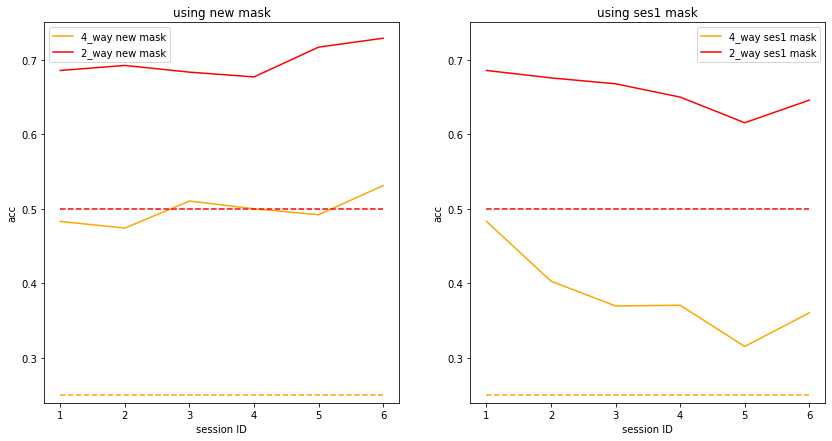

In [155]:
# plt.subplot(1,2,1)
# plt.plot(np.arange(1,7),new_trained_full_rotation_4_way_accuracy_mean,label="4_way mask_each session")
# plt.plot(np.arange(1,7),mean_of_2_way_clf_acc_full_rotation,label="2_way mask_each session")
# plt.title("2-way and 4-way clf acc, mean of full rotation")
# plt.legend()
# plt.ylabel("acc")
# plt.xlabel("session ID")



# plt.subplot(1,2,2)
# plt.plot(np.arange(1,7),way4,label="4_way")
# plt.plot(np.arange(1,7),way2,label="2_way")
# plt.title("2-way and 4-way clf acc, mean of full rotation, all using ses1 mask")
# plt.legend()
# plt.ylabel("acc")
# plt.xlabel("session ID")

fig,axs=plt.subplots(1,2,figsize=(14,7))
axs[0].plot(np.arange(1,7),new_trained_full_rotation_4_way_accuracy_mean,label="4_way new mask",color="orange")
axs[0].plot(np.arange(1,7),mean_of_2_way_clf_acc_full_rotation,label="2_way new mask",color="red")
axs[0].plot(np.arange(1,7),[0.25]*6,'--',color='orange')
axs[0].plot(np.arange(1,7),[0.5]*6,'--',color='red')
axs[0].legend()
axs[0].set_ylabel("acc")
axs[0].set_xlabel("session ID")
axs[0].set_ylim([0.24,0.75])
axs[0].set_title("using new mask")


way4=[0.4831006205673759, 0.4030363475177305, 0.36979166666666663, 0.37076732577860005, 0.31551611162503856, 0.3605385638297872]
way2=[0.6854242149758454, 0.6754604468599034, 0.6675347222222222, 0.6497481609574001, 0.6153621815985947, 0.6456068840579711]
axs[1].plot(np.arange(1,7),way4,label="4_way ses1 mask",color="orange")
axs[1].plot(np.arange(1,7),way2,label="2_way ses1 mask",color="red")
axs[1].plot(np.arange(1,7),[0.25]*6,'--',color='orange')
axs[1].plot(np.arange(1,7),[0.5]*6,'--',color='red')
axs[1].legend()
axs[1].set_ylabel("acc")
axs[1].set_xlabel("session ID")
axs[1].set_ylim([0.24,0.75])
axs[1].set_title("using ses1 mask")

# plt.subplot(1,2,2)
# plt.plot(np.arange(1,7),way4,label="4_way")
# plt.plot(np.arange(1,7),way2,label="2_way")
# plt.title("2-way and 4-way clf acc, mean of full rotation, all using ses1 mask")
# plt.legend()
# plt.ylabel("acc")
# plt.xlabel("session ID")


In [193]:

def saveNii(topN, cfg, nii_path):
    for pn, parc in enumerate(topN):
        _mask = nib.load(f"{cfg.subjects_dir}{cfg.subjectName}/ses1/recognition/mask/GMschaefer_{parc}")
        aff = _mask.affine
        header = _mask.header
        _mask = _mask.get_data()
        _mask = _mask.astype(int)
        mask = _mask if pn == 0 else mask + _mask
        mask[mask>0] = 1
    nii_img = nib.Nifti1Image(mask, aff, header)
    nib.save(nii_img, nii_path)
for currSes in range(1,len(bestROIs)+1):
    saveNii(bestROIs[currSes-1], cfg, f"{cfg.subjects_dir}{cfg.subjectName}/ses{currSes}/recognition/NewGreedyChosenMask.nii")


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


In [204]:
!pip install ipympl
%matplotlib notebook

     |████████████████████████████████| 106 kB 7.2 MB/s eta 0:00:01
     |████████████████████████████████| 120 kB 11.2 MB/s eta 0:00:01
     |████████████████████████████████| 10.3 MB 10.8 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 46.0 MB/s eta 0:00:01
     |████████████████████████████████| 427 kB 25.3 MB/s eta 0:00:01
     |████████████████████████████████| 112 kB 27.2 MB/s eta 0:00:01
     |████████████████████████████████| 100 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 785 kB 25.2 MB/s eta 0:00:01
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)
     |████████████████████████████████| 15.4 MB 34.3 MB/s eta 0:00:01
  Using cached kiwisolver-1.3.1-cp38-cp38-manylinux1_x86_64.whl (1.2 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
     |████████████████████████████████| 3.0 MB 24.9 MB/s eta 0:00:01
     |████████████████████████████████| 178 kB 35.0

  Created wheel for pyrsistent: filename=pyrsistent-0.17.3-cp38-cp38-linux_x86_64.whl size=69944 sha256=ec80ea0824d69ef6f932fc76cf8fe1187c25897799eb6709f35b8b8023c6c105
  Stored in directory: /gpfs/milgram/home/kp578/.cache/pip/wheels/3d/22/08/7042eb6309c650c7b53615d5df5cc61f1ea9680e7edd3a08d2
  Created wheel for pandocfilters: filename=pandocfilters-1.4.3-py3-none-any.whl size=7991 sha256=21352473e2c1fd3c1b15501d6393277b362c6529a6a4384e77904e29c40bee14
  Stored in directory: /gpfs/milgram/home/kp578/.cache/pip/wheels/fc/39/52/8d6f3cec1cca4ceb44d658427c35711b19d89dbc4914af657f
Successfully built pyrsistent pandocfilters
ERROR: Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: '/gpfs/milgram/apps/hpc.rhel7/software/miniconda/4.8.3/lib/python3.8/site-packages/tornado-6.1.dist-info'
Consider using the `--user` option or check the permissions.



ModuleNotFoundError: No module named 'ipympl'

In [205]:

from nilearn import plotting
currSes=1
tmap_filename = f"{cfg.subjects_dir}{cfg.subjectName}/ses{currSes}/recognition/NewGreedyChosenMask.nii"
# plotting.plot_stat_map(tmap_filename)
tmap_filename

'/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/subjects/sub002/ses1/recognition/NewGreedyChosenMask.nii'

/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/nilearn/plotting/displays.py:780: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


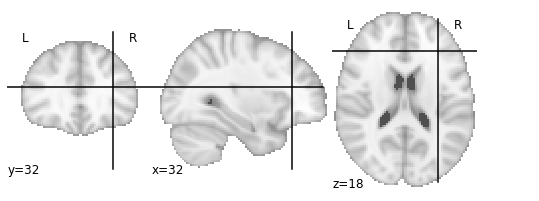

In [195]:
plotting.plot_stat_map(tmap_filename, threshold=3)